# **SHETH L.U.J. & SIR M.V. COLLEGE**

**Shreeraj Desai | T075**
### **Practical No. 9**
**Aim**: Principal Component Analysis (PCA)

*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal components.
*   Visualize the data in the reduced-dimensional space.







## 1. Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('Datasets/mushrooms.csv')

X = df.drop('class', axis=1)
y_categorical = df['class']

X_encoded = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y_categorical)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

print(X_std.shape)

(8124, 95)


## 2. Reducing Features Using Principal Components (PCA)

Original number of features: 95
Reduced number of features: 2


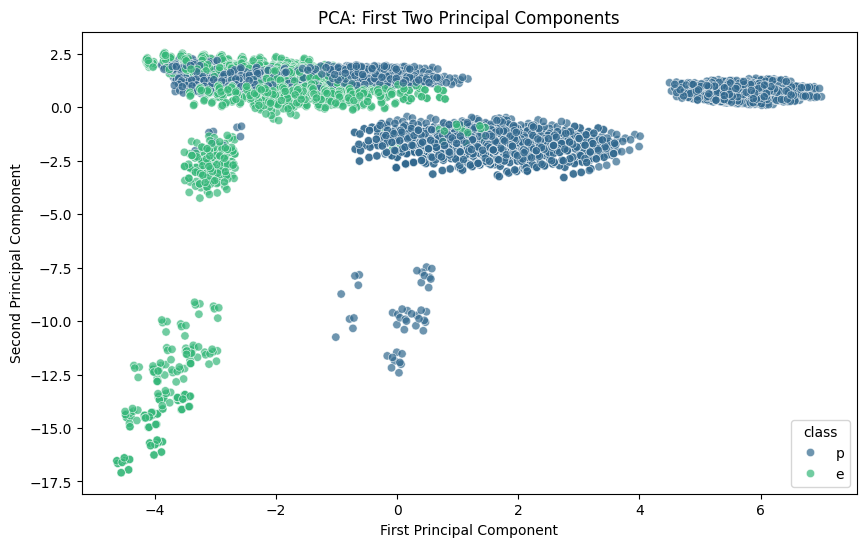

In [ ]:
if not df.empty:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)

    print('Original number of features:', X_std.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_categorical, palette='viridis', alpha=0.7)
    plt.title('PCA: First Two Principal Components')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

## 3. Reducing Features When Data Is Linearly Inseparable (Kernel PCA)

Original number of features: 95
Reduced number of features: 2


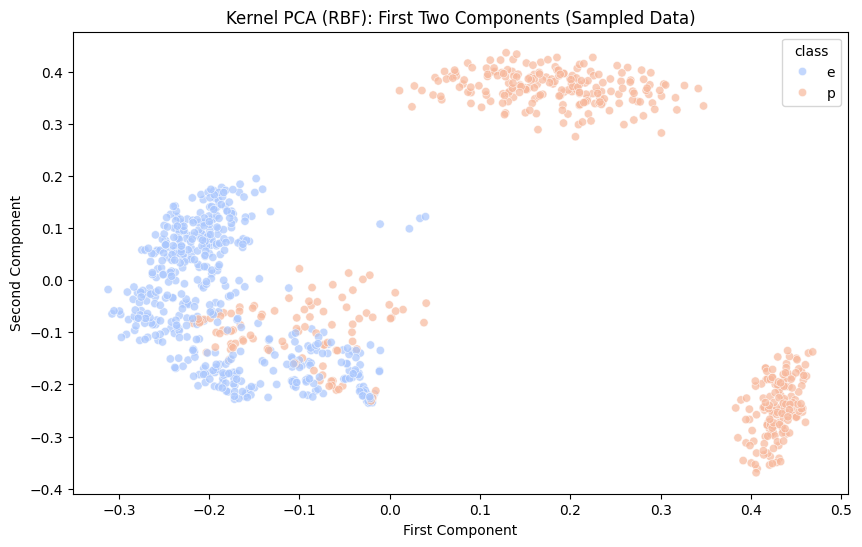

In [ ]:
if not df.empty:
    indices = np.random.choice(X_std.shape[0], 1000, replace=False)
    X_sample = X_std[indices]
    y_sample = y_categorical.iloc[indices]

    kpca = KernelPCA(kernel="rbf", gamma=0.01, n_components=2)
    X_kpca = kpca.fit_transform(X_sample)

    print('Original number of features:', X_sample.shape[1])
    print('Reduced number of features:', X_kpca.shape[1])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y_sample, palette='coolwarm', alpha=0.7)
    plt.title('Kernel PCA (RBF): First Two Components (Sampled Data)')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.show()

## 4. Reducing Features by Maximizing Class Separability (LDA)

Original number of features: 95
Reduced number of features: 1
Explained variance ratio: [1.]


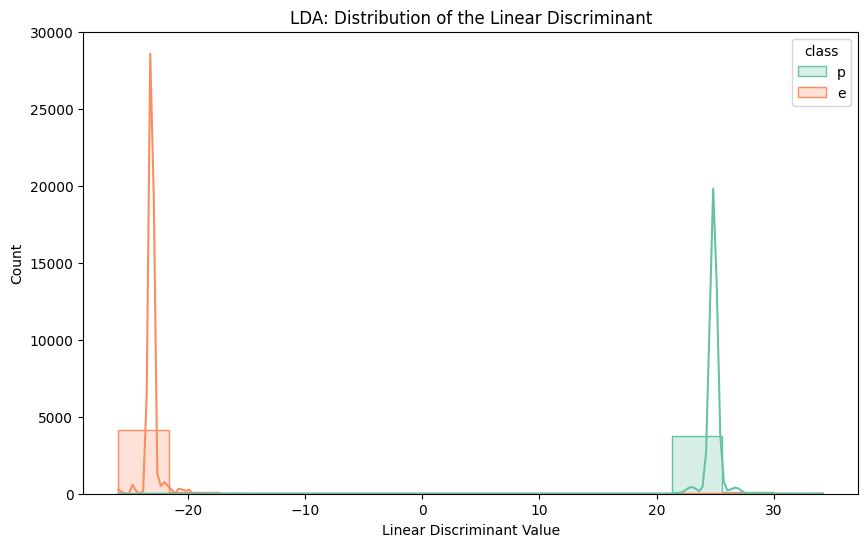

In [ ]:
if not df.empty:
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit(X_std, y).transform(X_std)

    print('Original number of features:', X_std.shape[1])
    print('Reduced number of features:', X_lda.shape[1])
    print('Explained variance ratio:', lda.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    sns.histplot(x=X_lda.flatten(), hue=y_categorical, kde=True, element="step", palette='Set2')
    plt.title('LDA: Distribution of the Linear Discriminant')
    plt.xlabel('Linear Discriminant Value')
    plt.ylabel('Count')
    plt.show()

## 1. Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('Datasets/mushrooms.csv')

if not df.empty:
    X = df.drop('class', axis=1)
    y_categorical = df['class']

    X = pd.get_dummies(X, drop_first=True)

    le = LabelEncoder()
    y = le.fit_transform(y_categorical)

    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    print(f"Original feature shape: {X.shape}")
    print(f"Standardized feature shape: {X_std.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/mushrooms.csv'

## 2. Reducing Features Using Principal Components (PCA)

In [ ]:
if not df.empty:
    pca = PCA(n_components=0.95, whiten=True)

    X_pca = pca.fit_transform(X_std)

    print('Original number of features:', X_std.shape[1])
    print('Reduced number of features:', X_pca.shape[1])

Original number of features: 95
Reduced number of features: 55


## 3. Reducing Features When Data Is Linearly Inseparable (Kernel PCA)

In [ ]:
if not df.empty:
    kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=10)
    X_kpca = kpca.fit_transform(X_std)

    print('Original number of features:', X_std.shape[1])
    print('Reduced number of features:', X_kpca.shape[1])

Original number of features: 95
Reduced number of features: 10


## 4. Reducing Features by Maximizing Class Separability (LDA)

In [ ]:
if not df.empty:
    lda = LinearDiscriminantAnalysis(n_components=1)

    X_lda = lda.fit(X_std, y).transform(X_std)

    print('Original number of features:', X_std.shape[1])
    print('Reduced number of features:', X_lda.shape[1])
    print('\nExplained variance ratio:', lda.explained_variance_ratio_)

Original number of features: 95
Reduced number of features: 1

Explained variance ratio: [1.]
